In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotnine as p9

In [2]:
# loading first data
data = pd.read_excel(r'datawise_case_study_data.xlsx')
data.head()

,Unique Product Code,Product Name,Date,Location1 Sales,Location2 Sales
0,3,productZ,Mar2019,79,98.0
1,2,productY,Mar2018,1,96.0
2,3,productZ,Apr2019,64,95.0
3,1,prouctX,Feb2018,15,95.0
4,3,productZ,Feb2018,6,93.0


In [3]:
# checking the shape
print('The shape of the data is:{}'.format(data.shape))

The shape of the data is:(27, 5)


In [4]:
# checking general information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unique Product Code  27 non-null     int64  
 1   Product Name         27 non-null     object 
 2   Date                 27 non-null     object 
 3   Location1 Sales      27 non-null     int64  
 4   Location2 Sales      26 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ KB


In [5]:
data[['Location1 Sales', 'Location2 Sales']].describe()

,Location1 Sales,Location2 Sales
count,27.000000,26.000000
mean,45.851852,58.038462
std,30.198960,29.681618
min,1.000000,9.000000
25%,21.000000,38.500000
50%,38.000000,58.500000
75%,76.500000,85.750000
max,88.000000,98.000000


In [6]:
# checking missing values
data.isnull().sum()

Unique Product Code    0
Product Name           0
Date                   0
Location1 Sales        0
Location2 Sales        1
dtype: int64

In [7]:
# checking mean of column
print('The mean of Location2 Sales: {}'.format(data['Location2 Sales'].mean()))

The mean of Location2 Sales: 58.03846153846154


In [8]:
# filling missing value in
data['Location2 Sales'] = data['Location2 Sales'].fillna(round(data['Location2 Sales'].mean()))

In [9]:
# checking number of unique values
data.nunique()

Unique Product Code     3
Product Name            5
Date                    8
Location1 Sales        24
Location2 Sales        23
dtype: int64

In [10]:
# correcting the spelling
data['Product Name'] = data['Product Name'].replace('prouctX', 'productX')
data['Product Name'] = data['Product Name'].replace('prouct-X', 'productX')
data['Product Name'] = data['Product Name'].replace('product.Y', 'productY')

In [11]:
# checking duplicate values
duplicateCheck = data[data.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateCheck)

Duplicate Rows except first occurrence based on all columns are :
    Unique Product Code Product Name     Date  Location1 Sales  \
9                     1     productX  Jan2018               82   
12                    3     productZ  Jan2018               35   

    Location2 Sales  
9              77.0  
12             65.0  


In [12]:
# dropping duplicates
data = data.drop_duplicates()

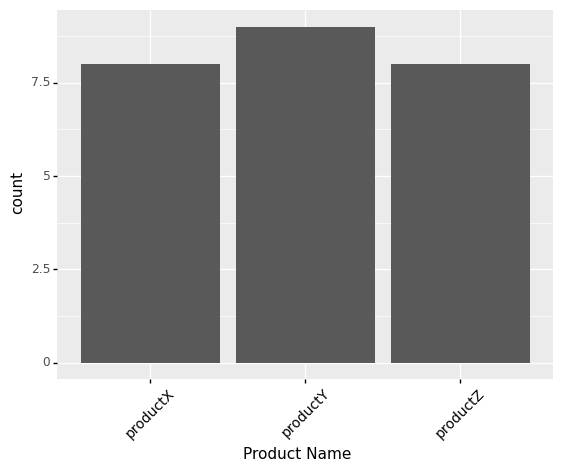

<ggplot: (132404365294)>

In [13]:
# plotting number of each product frequency
my_custom_theme = p9.theme(axis_text_x = p9.element_text(color="black", size=10,
                                                         angle=45, hjust=.5))
(p9.ggplot(data=data,
           mapping=p9.aes(x='Product Name'))
    + p9.geom_bar()
 + my_custom_theme
)

In [14]:
# sorting according to the name and date
data['Date'] =  pd.to_datetime(data['Date'])
data = data.sort_values(by=['Product Name', 'Date'])
data.head()

,Unique Product Code,Product Name,Date,Location1 Sales,Location2 Sales
8,1,productX,2018-01-01,82,77.0
3,1,productX,2018-02-01,15,95.0
10,1,productX,2018-03-01,65,70.0
16,1,productX,2018-04-01,84,44.0
15,1,productX,2019-01-01,5,46.0


In [15]:
data1 = pd.read_excel(r'changed_data.xlsx')

In [16]:
# checking duplicates
duplicateCheck = data1[data1.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateCheck)

Duplicate Rows except first occurrence based on all columns are :
    Unique Product Code Product Name       Date   Location  Sales  Month  \
2                     1     productX 2018-01-01  Location1     82      1   
3                     1     productX 2018-01-01  Location2     77      1   
32                    2     productY 2019-03-01  Location1     27      3   
38                    3     productZ 2018-01-01  Location1     35      1   
39                    3     productZ 2018-01-01  Location2     65      1   

    Year   Newdate  
2   2018  1.1.2018  
3   2018  1.1.2018  
32  2019  1.3.2019  
38  2018  1.1.2018  
39  2018  1.1.2018  


In [17]:
# dropping duplicates
data1 = data1.drop_duplicates()

In [18]:
# extracting day, month and year
data1['Day'] = pd.DatetimeIndex(data1['Date']).day
data1['Month'] = pd.DatetimeIndex(data1['Date']).month
data1['Year'] = pd.DatetimeIndex(data1['Date']).year

In [19]:
# creating new column
cols=["Day","Month","Year"]
data1['Newdate'] = data1[cols].apply(lambda x: '.'.join(x.values.astype(str)), axis="columns")

In [20]:
del data1['Day']
data1.head()

,Unique Product Code,Product Name,Date,Location,Sales,Month,Year,Newdate
0,1,productX,2018-01-01,Location1,82,1,2018,1.1.2018
1,1,productX,2018-01-01,Location2,77,1,2018,1.1.2018
4,1,productX,2018-02-01,Location1,15,2,2018,1.2.2018
5,1,productX,2018-02-01,Location2,95,2,2018,1.2.2018
6,1,productX,2018-03-01,Location1,65,3,2018,1.3.2018


In [21]:
data2 = pd.read_excel(r'datawise_case_study_additionaldata.xlsx')

In [22]:
data2

,Location,Year,Population
0,Location1,2018,5109
1,Location1,2019,3528
2,Location2,2018,9806
3,Location2,2019,1740


In [23]:
data2.shape

(4, 3)

In [24]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Location    4 non-null      object
 1   Year        4 non-null      int64 
 2   Population  4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


In [25]:
# merging two datasets
data1=data1.merge(data2)
data1.head()

,Unique Product Code,Product Name,Date,Location,Sales,Month,Year,Newdate,Population
0,1,productX,2018-01-01,Location1,82,1,2018,1.1.2018,5109
1,1,productX,2018-02-01,Location1,15,2,2018,1.2.2018,5109
2,1,productX,2018-03-01,Location1,65,3,2018,1.3.2018,5109
3,1,productX,2018-04-01,Location1,84,4,2018,1.4.2018,5109
4,2,productY,2018-01-01,Location1,38,1,2018,1.1.2018,5109


In [27]:
data1.to_excel('new_data.xlsx')

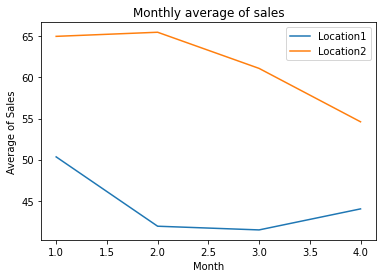

In [28]:
# uploading average dataset and then plotting line graph by locations
data3 = pd.read_excel(r'ave2018.xlsx')

x_coord = data3['Month'].head(4)
y1_coord = data3['Average of sales'].head(4)
y2_coord = data3['Average of sales'].tail(4)

plt.plot(x_coord, y1_coord) # plot first line
plt.plot(x_coord, y2_coord) # plot second line

plt.xlabel('Month')
plt.ylabel('Average of Sales')
plt.title('Monthly average of sales')
plt.legend(['Location1','Location2'])

Text(0.5, 1.0, 'Percentage of Sales in 2018')

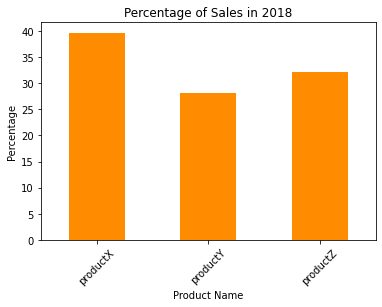

In [29]:
# uploading average dataset and then plotting bar chart
data4 = pd.read_excel(r'year2018.xlsx')

x_coord = data4['Month']
y_coord = data4.groupby(['Product Name'])['Sales'].sum()/data4['Sales'].sum() * 100

y_coord.plot(kind='bar', color = 'darkorange',rot=45)
plt.ylabel('Percentage')
plt.title('Percentage of Sales in 2018')

Text(0.5, 1.0, 'Percentage of Sales in 2019')

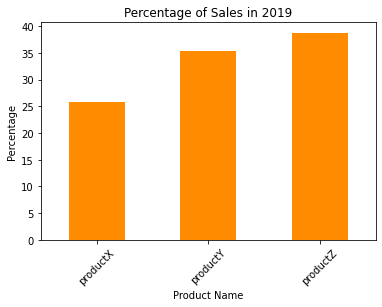

In [30]:
# uploading average dataset and then plotting bar chart
data5 = pd.read_excel(r'year2019.xlsx')

x_coord = data5['Month']
y_coord = data5.groupby(['Product Name'])['Sales'].sum()/data5['Sales'].sum() *100

y_coord.plot(kind='bar', color = 'darkorange', rot=45)
plt.ylabel('Number of Products')
plt.ylabel('Percentage')
plt.title('Percentage of Sales in 2019')

Text(0.5, 1.0, 'Number of Products by Location')

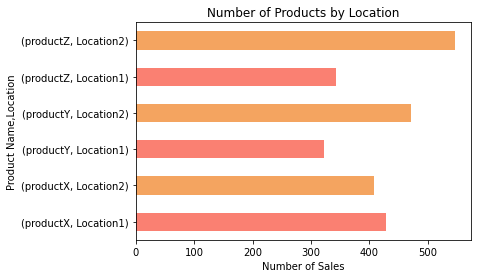

In [31]:
# grouping the date by name and location and plotting the total number of sales
y4=data1.groupby(['Product Name','Location'])['Sales'].sum()
y4.plot(kind='barh', color=['salmon', 'sandybrown'])
plt.xlabel('Number of Sales')
plt.title('Number of Products by Location')